In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/converted - Copy.csv')
df.head()

,text,label
0,these tiktoks radiate gay chaotic energy and i...,1
1,@Champions Again He got killed for using false...,1
2,It's not that all lives don't matter,1
3,Is it really that difficult to understand? Bla...,1
4,Whenever we say black isn't that racists? Why...,1


In [4]:
df.label.value_counts()

1    20781
0     1962
Name: label, dtype: int64

In [5]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1013, 2)


In [6]:
df = df.drop_duplicates()

In [7]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

text: 21679 distinct values
label: 2 distinct values


In [8]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


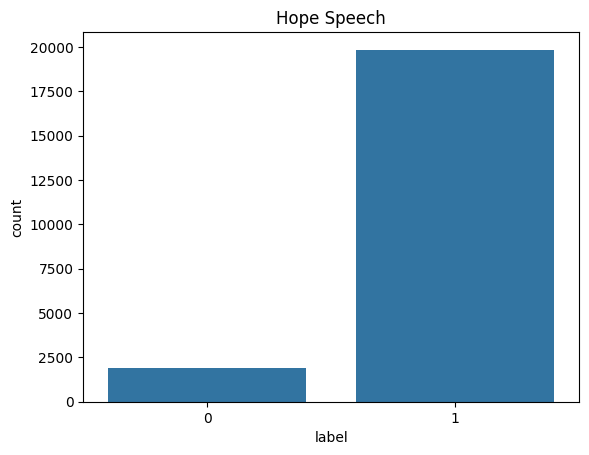

In [9]:
sns.countplot(x='label', data=df)
plt.title('Hope Speech')
plt.show()

In [27]:
X = df.iloc[:,:-1]
y = df.label
X.head()

,text
0,these tiktoks radiate gay chaotic energy and i...
1,@Champions Again He got killed for using false...
2,It's not that all lives don't matter
3,Is it really that difficult to understand? Bla...
4,Whenever we say black isn't that racists? Why...


In [28]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

,text
0,21011
1,897
2,11073
3,10712
4,18228


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['label'], stratify=df['label'])

In [30]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [31]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [34]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [35]:
print(X_train_features)

  (0, 2678)	0.4750076330178506
  (0, 4196)	0.56974895864274
  (0, 2038)	0.44844111573651974
  (0, 15828)	0.49865262299247726
  (1, 12050)	0.623982743596785
  (1, 111)	0.7814381201947016
  (2, 6384)	0.39147568710896563
  (2, 14902)	0.34381106827381913
  (2, 8713)	0.45711009362859695
  (2, 8244)	0.2028580406731438
  (2, 15512)	0.25544276482454487
  (2, 13057)	0.6427975632116844
  (3, 8166)	0.17374925567514463
  (3, 6238)	0.3056836538276475
  (3, 8531)	0.28236785024821454
  (3, 10522)	0.39877842831605115
  (3, 2909)	0.2807576947936207
  (3, 12676)	0.6841460727621738
  (3, 9654)	0.3012177453756016
  (4, 1074)	0.13604696644347075
  (4, 10229)	0.13883176360414806
  (4, 13768)	0.10867945834259403
  (4, 14270)	0.15282727720850928
  (4, 6803)	0.13165288253683283
  (4, 15680)	0.12985385301427047
  :	:
  (16293, 9045)	0.3949642178438979
  (16293, 8044)	0.42227148175399365
  (16293, 5487)	0.3092112064547572
  (16293, 8327)	0.3390303134675861
  (16293, 6818)	0.30840322468782033
  (16293, 4239)	0.22

In [37]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [38]:
predict_train_data=model.predict(X_train_features)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9252623182180769


In [66]:
predict_test_data=model.predict(X_test_features)

In [67]:
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("accuracy on test data: ",accuracy_test_data)

accuracy on test data:  0.920854040125161


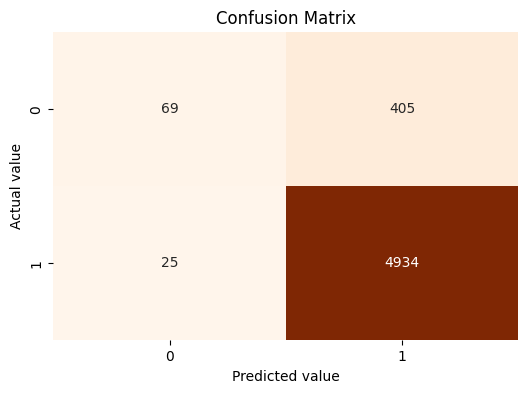

In [68]:
conf_matrix=confusion_matrix(y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

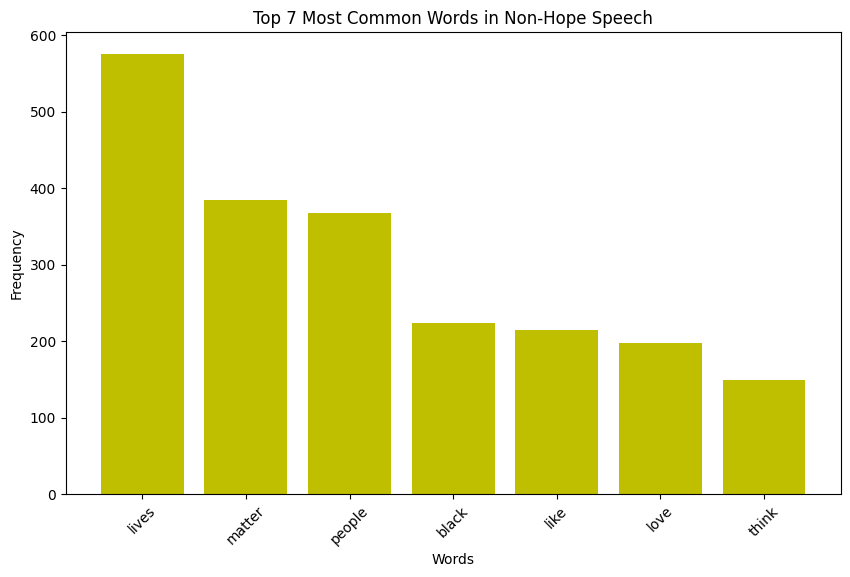

In [69]:
stop_words = set(stopwords.words('english'))
non_hope_words = " ".join(df[df['label'] == 0]['text']).split()
hope_words = " ".join(df[df['label'] == 1]['text']).split()

non_hope_words_freq = Counter([word.lower() for word in non_hope_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*non_hope_words_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Non-Hope Speech')
plt.xticks(rotation=45)
plt.show()

In [71]:
print(classification_report(y_test, predict_test_data))

              precision    recall  f1-score   support

           0       0.73      0.15      0.24       474
           1       0.92      0.99      0.96      4959

    accuracy                           0.92      5433
   macro avg       0.83      0.57      0.60      5433
weighted avg       0.91      0.92      0.90      5433



# Under Sampling


In [72]:
df_hope = df[df['label']==0]
df_hope.shape

(1895, 2)

In [73]:
df_nhope = df[df['label']==1]
df_nhope.shape

(19835, 2)

In [74]:
df_nhope_downsampled = df_nhope.sample(df_hope.shape[0])
df_nhope_downsampled.shape

(1895, 2)

In [75]:
df_balanced = pd.concat([df_hope, df_nhope_downsampled])
df_balanced.shape

(3790, 2)

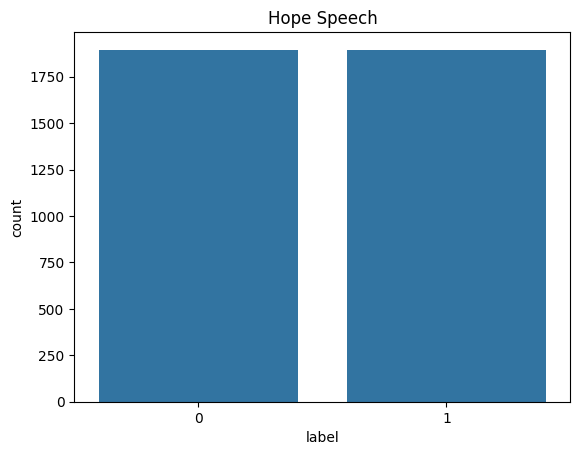

In [77]:
sns.countplot(x='label', data=df_balanced)
plt.title('Hope Speech')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'],df_balanced['label'], stratify=df_balanced['label'])

In [80]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [81]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [82]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [83]:
print(X_train_features)

  (0, 1059)	0.420309592485227
  (0, 3021)	0.4381690261701654
  (0, 3969)	0.6775080812747671
  (0, 3161)	0.41512715013279367
  (1, 912)	0.12914216316529825
  (1, 3468)	0.17564674867170035
  (1, 349)	0.184714561549309
  (1, 1568)	0.07388255279325642
  (1, 2829)	0.07577127643316221
  (1, 473)	0.1510774072919577
  (1, 5716)	0.09884913336107094
  (1, 5099)	0.1343667206267979
  (1, 3177)	0.10651874233207659
  (1, 5406)	0.11946160022360776
  (1, 129)	0.184714561549309
  (1, 203)	0.17564674867170035
  (1, 3930)	0.06633520733385309
  (1, 5015)	0.184714561549309
  (1, 3637)	0.17564674867170035
  (1, 2869)	0.1166269278296841
  (1, 3465)	0.17564674867170035
  (1, 265)	0.1510774072919577
  (1, 1550)	0.10979737924705527
  (1, 4093)	0.31339559542312156
  (1, 4747)	0.2823925384188535
  :	:
  (2839, 4070)	0.274560013677945
  (2839, 1705)	0.3453235178742487
  (2839, 323)	0.28085184828133547
  (2839, 3010)	0.2292898747148939
  (2839, 5626)	0.19987320951634574
  (2839, 4580)	0.16781717435818774
  (2839, 3

In [84]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [86]:
predict_train_data=model.predict(X_train_features)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.8800140745953554


In [88]:
predict_test_data=model.predict(X_test_features)

In [89]:
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("accuracy on test data: ",accuracy_test_data)

accuracy on test data:  0.759493670886076


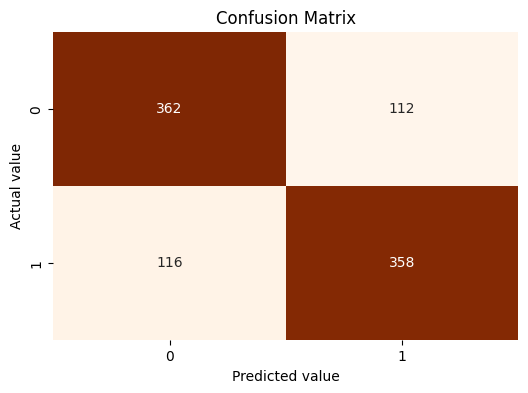

In [90]:
conf_matrix=confusion_matrix(y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

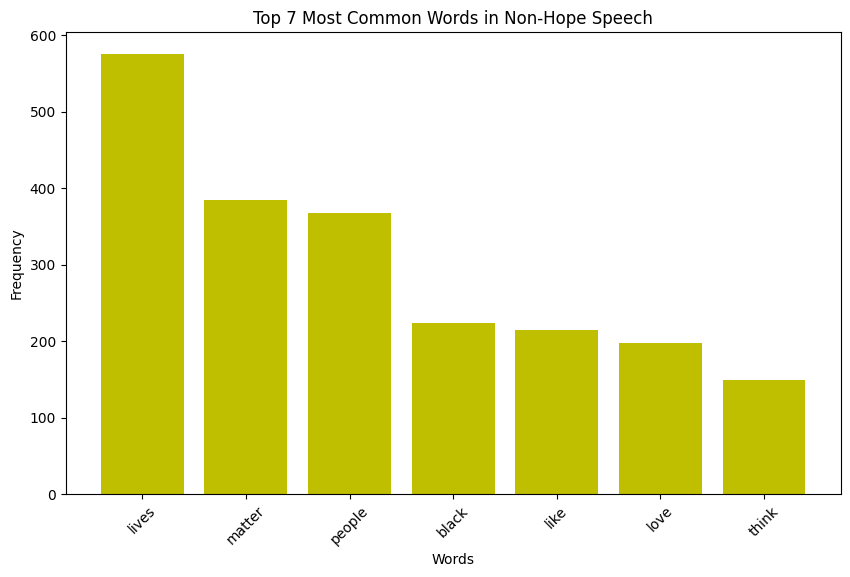

In [91]:
stop_words = set(stopwords.words('english'))
non_hope_words = " ".join(df[df['label'] == 0]['text']).split()
hope_words = " ".join(df[df['label'] == 1]['text']).split()

non_hope_words_freq = Counter([word.lower() for word in non_hope_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*non_hope_words_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Non-Hope Speech')
plt.xticks(rotation=45)
plt.show()

In [92]:
print(classification_report(y_test, predict_test_data))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       474
           1       0.76      0.76      0.76       474

    accuracy                           0.76       948
   macro avg       0.76      0.76      0.76       948
weighted avg       0.76      0.76      0.76       948



# Over Sampling

In [93]:
df_hope_oversample = df_hope.sample(df_nhope.shape[0], replace=True)
df_over = pd.concat([df_hope_oversample, df_nhope], axis=0)

print('Random over-sampling:')
print(df_over.label.value_counts())

Random over-sampling:
0    19835
1    19835
Name: label, dtype: int64


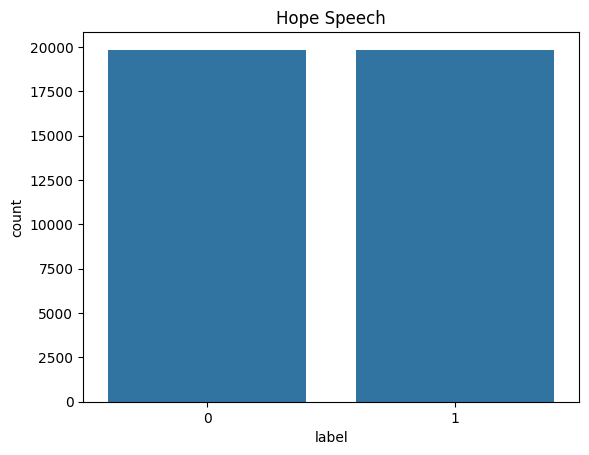

In [94]:
sns.countplot(x='label', data=df_over)
plt.title('Hope Speech')
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_over['text'],df_over['label'], stratify=df_over['label'])

In [96]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [97]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [98]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [99]:
print(X_train_features)

  (0, 14994)	0.4661675617181506
  (0, 5510)	0.4567469517842317
  (0, 11134)	0.35127780008551446
  (0, 6271)	0.46403810338284185
  (0, 722)	0.4851211933254445
  (1, 4709)	0.7151284301603554
  (1, 15791)	0.4151296316983668
  (1, 11882)	0.43811282501073834
  (1, 5983)	0.35258455698381647
  (2, 9071)	0.6240951085064497
  (2, 2758)	0.7813483829498356
  (3, 5121)	0.44739998425435823
  (3, 13760)	0.49808913621510004
  (3, 2547)	0.4494165273731902
  (3, 6005)	0.516071399047688
  (3, 1801)	0.28885214640448853
  (4, 4756)	0.2963426206850451
  (4, 13467)	0.49386171987056676
  (4, 13920)	0.4280998290014728
  (4, 5888)	0.32054005161300414
  (4, 6816)	0.6182768510407356
  (5, 4822)	0.16447877022551907
  (5, 7617)	0.10633562275297494
  (5, 10838)	0.09321856802033263
  (5, 7143)	0.33300988374006507
  :	:
  (29748, 1735)	0.18286509629519263
  (29749, 7008)	0.7674112658156595
  (29749, 8283)	0.5530859683749285
  (29749, 1735)	0.32430828032286635
  (29750, 3826)	0.3956228261938543
  (29750, 11136)	0.3546

In [100]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [101]:
predict_train_data=model.predict(X_train_features)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9369454154342565


In [103]:
predict_test_data=model.predict(X_test_features)

In [104]:
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("accuracy on test data: ",accuracy_test_data)

accuracy on test data:  0.911373260738052


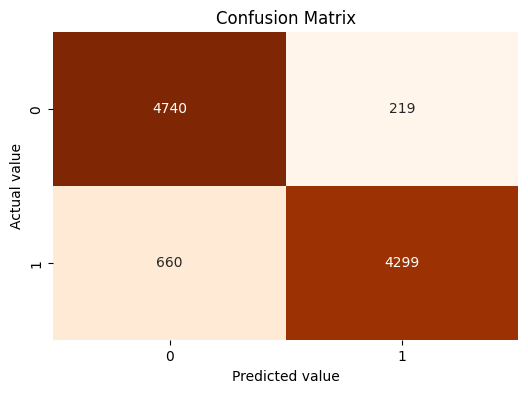

In [105]:
conf_matrix=confusion_matrix(y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

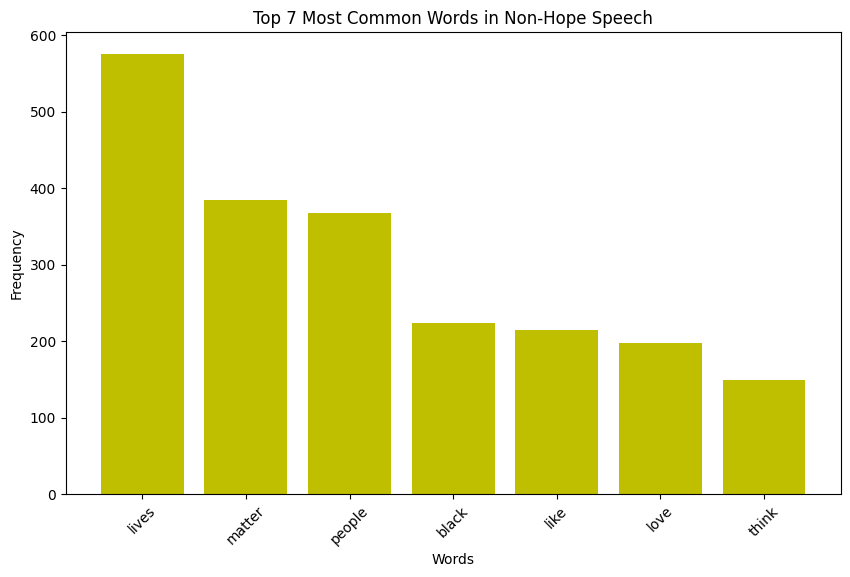

In [106]:
stop_words = set(stopwords.words('english'))
non_hope_words = " ".join(df[df['label'] == 0]['text']).split()
hope_words = " ".join(df[df['label'] == 1]['text']).split()

non_hope_words_freq = Counter([word.lower() for word in non_hope_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*non_hope_words_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Non-Hope Speech')
plt.xticks(rotation=45)
plt.show()

In [107]:
print(classification_report(y_test, predict_test_data))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4959
           1       0.95      0.87      0.91      4959

    accuracy                           0.91      9918
   macro avg       0.91      0.91      0.91      9918
weighted avg       0.91      0.91      0.91      9918

